<a href="https://colab.research.google.com/github/shreepunitha26/customer-segmentation-using-clustering/blob/main/TASK_2_Customer_segmentation_using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Step 2: Load the dataset**

In [ ]:
df = pd.read_csv('Retail Sales Analysis_utf.csv')  # Replace with your actual file
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


**Step 3: Basic Info**

In [ ]:
print(df.info())
print(df.describe())
print("Missing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB
None
       transactions_id  customer_id          age      quantiy  price_per_unit  \
count      2000.000000  2000.000000  1990.000000  1997.000000     1997.000000   
mean       1000.500000    66.341500    41.343216     2.512769   

**Step 4: Feature selection for clustering**

In [ ]:
# Group by customer_id and aggregate purchase behavior
df_grouped = df.groupby('customer_id')[['quantiy', 'total_sale', 'cogs']].sum().reset_index()

# Select features for clustering
X = df_grouped[['quantiy', 'total_sale', 'cogs']]

# ✅ Print to verify the selected features
print("✅ Features selected for clustering:")
print(X.head())  # Show first 5 rows


✅ Features selected for clustering:
   quantiy  total_sale     cogs
0    186.0     30750.0  4995.65
1    154.0     25295.0  4820.25
2    201.0     38440.0  5579.15
3    164.0     23580.0  4133.05
4    159.0     30405.0  4821.65


**Step 5: Scaling the features**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Print the first 5 rows of scaled features
print("✅ Scaled features (first 5 rows):")
print(X_scaled[:5])

✅ Scaled features (first 5 rows):
[[5.33599163 4.66721695 3.90482898]
 [4.22451345 3.64342193 3.72322225]
 [5.85699703 6.11047702 4.50897681]
 [4.57185038 3.32155053 3.01170488]
 [4.39818191 4.60246731 3.72467179]]


**Step 6: Elbow method to determine no of clusters**

✅ Within-Cluster Sum of Squares (WCSS) for 1 to 10 clusters:
Clusters: 1, WCSS: 465.00
Clusters: 2, WCSS: 165.28
Clusters: 3, WCSS: 61.37
Clusters: 4, WCSS: 43.94
Clusters: 5, WCSS: 35.53
Clusters: 6, WCSS: 32.53
Clusters: 7, WCSS: 27.58
Clusters: 8, WCSS: 23.67
Clusters: 9, WCSS: 21.92
Clusters: 10, WCSS: 20.18


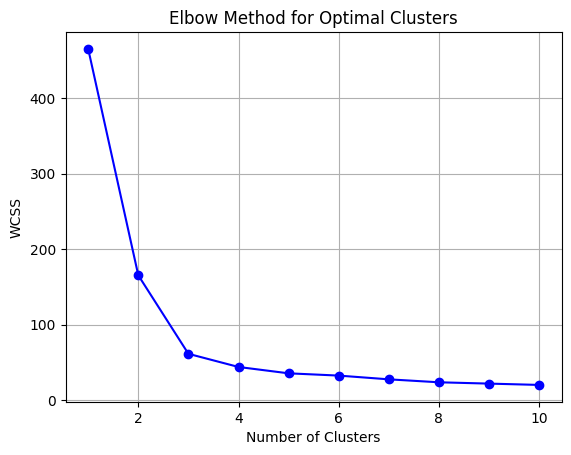

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store within-cluster sum of squares
wcss = []

# Calculate WCSS for clusters from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# ✅ Print WCSS values
print("✅ Within-Cluster Sum of Squares (WCSS) for 1 to 10 clusters:")
for i, val in enumerate(wcss, start=1):
    print(f"Clusters: {i}, WCSS: {val:.2f}")

# ✅ Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

**Step 7: Applying K-Means clustering**

In [ ]:
# Apply KMeans with chosen number of clusters (change 4 to your elbow result)
kmeans = KMeans(n_clusters=4, random_state=42)
df_grouped['Cluster'] = kmeans.fit_predict(X_scaled)

# ✅ Print the first 5 rows to verify cluster labels
print("✅ Clustering applied successfully. First 5 rows with assigned cluster labels:")
print(df_grouped[['customer_id', 'quantiy', 'total_sale', 'cogs', 'Cluster']].head())

✅ Clustering applied successfully. First 5 rows with assigned cluster labels:
   customer_id  quantiy  total_sale     cogs  Cluster
0            1    186.0     30750.0  4995.65        1
1            2    154.0     25295.0  4820.25        1
2            3    201.0     38440.0  5579.15        1
3            4    164.0     23580.0  4133.05        1
4            5    159.0     30405.0  4821.65        1


**Step 8: Visualize the clusters**

/tmp/ipython-input-23-3031691354.py:20: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


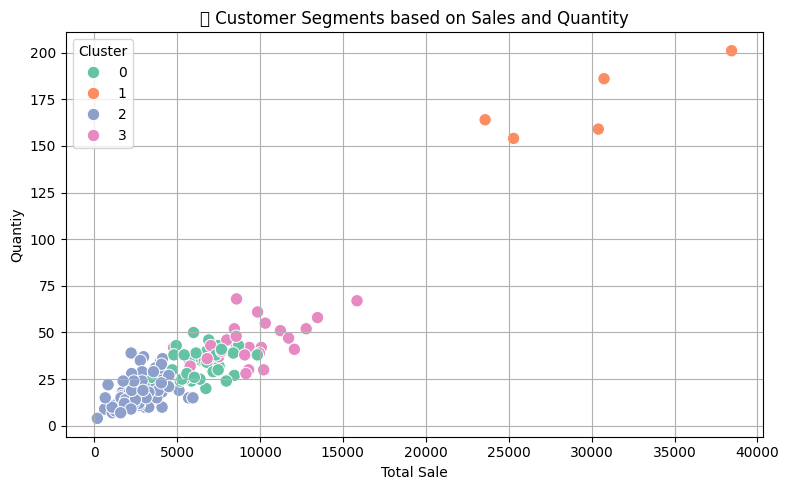

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Scatter plot of clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='total_sale',
    y='quantiy',
    hue='Cluster',
    data=df_grouped,
    palette='Set2',
    s=80
)

plt.title('✅ Customer Segments based on Sales and Quantity')
plt.xlabel('Total Sale')
plt.ylabel('Quantiy')  # Intentionally matching your column name typo
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()